# Anomaly Detection Exercise: Credit Card Fraud

**In this exercise, we will practice using the Local Outlier Factor and Isolation Forest methods to detect outliers in data sets. We will be looking at data from a selected subset of the data for the ["Credit Card Fraud Detection" Kaggle task](https://www.kaggle.com/mlg-ulb/creditcardfraud/data).**


### Inspiration
**Identify fraudulent credit card transactions.**

**Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.**


### Content

**The datasets contains transactions made by credit cards in September 2013 by european cardholders.**

**It contains only numerical input variables which are the result of a PCA transformation.** 

**Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data.**

**Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.**

**Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.**

**The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.**

**Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**
### Problem Statement:
**The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.**

## Questions:
### 1. Load the data in *creditcard_10k.csv.gz* into a Pandas dataframe *df* 
**sourse:** https://medium.com/datadriveninvestor/credit-card-fraud-detection-using-local-outlier-factor-and-isolation-forest-in-python-56edd0a44af5

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv('creditcard_10k.csv.gz', compression="gzip")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape 

(10000, 31)

We have 10000 rows and 31 features

In [4]:
df.isnull().values.any()

False

There are no null values - that's good

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  float64
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

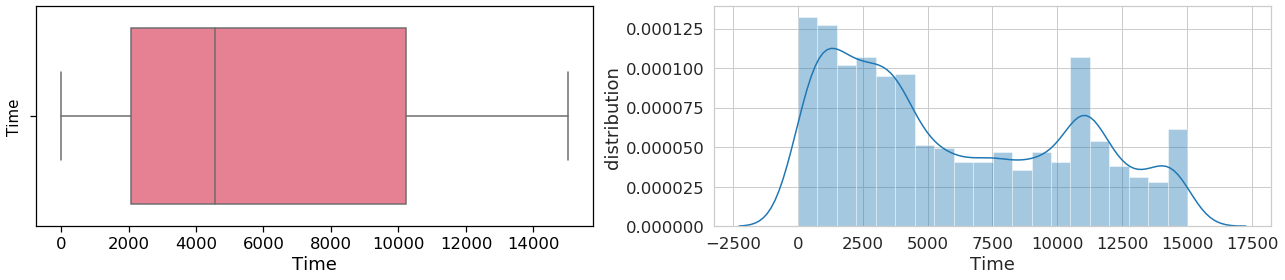

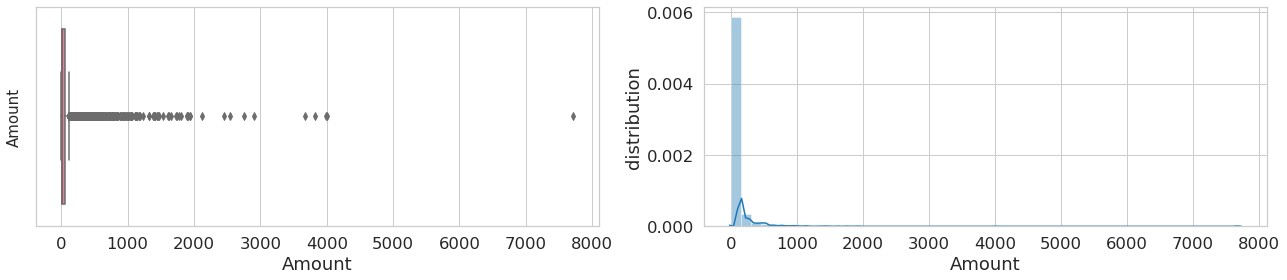

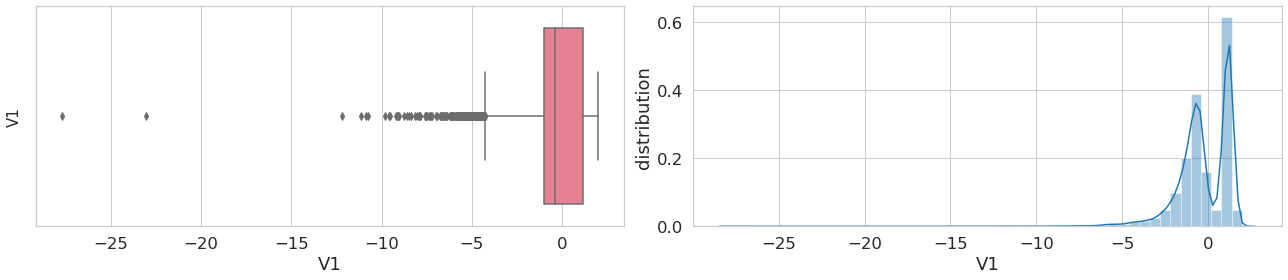

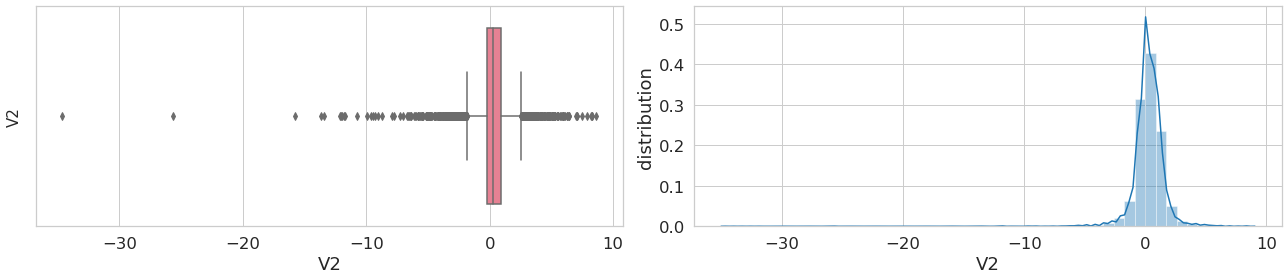

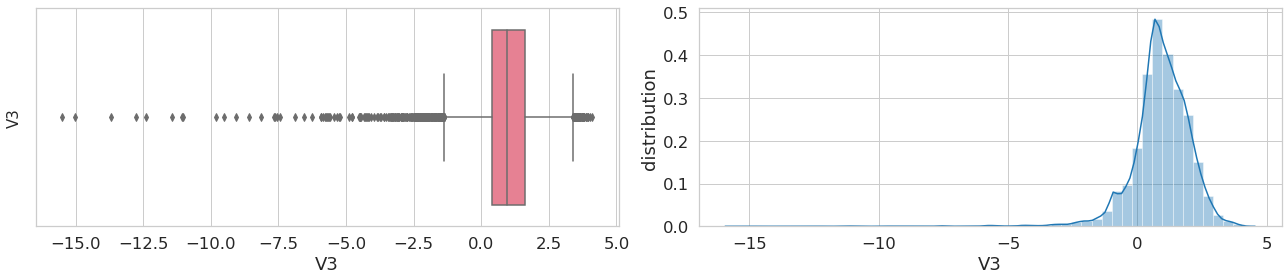

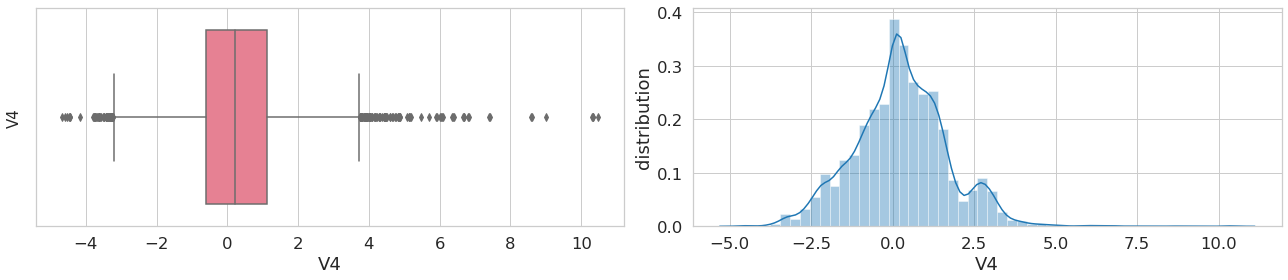

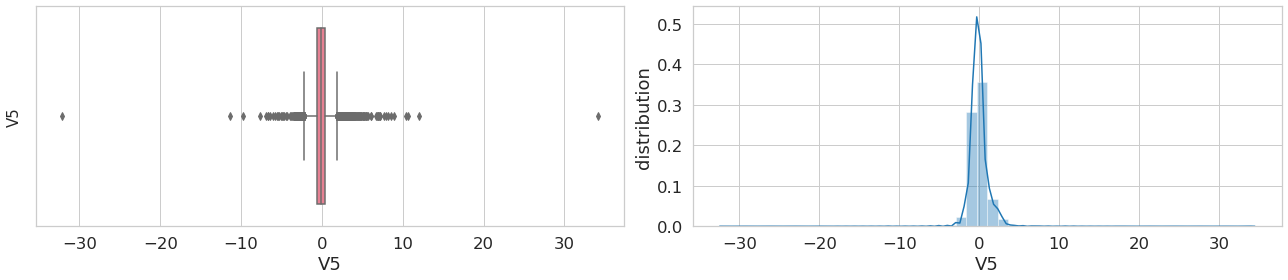

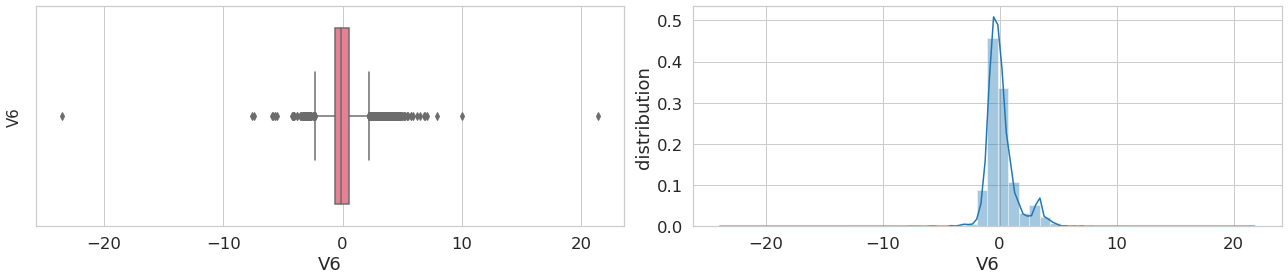

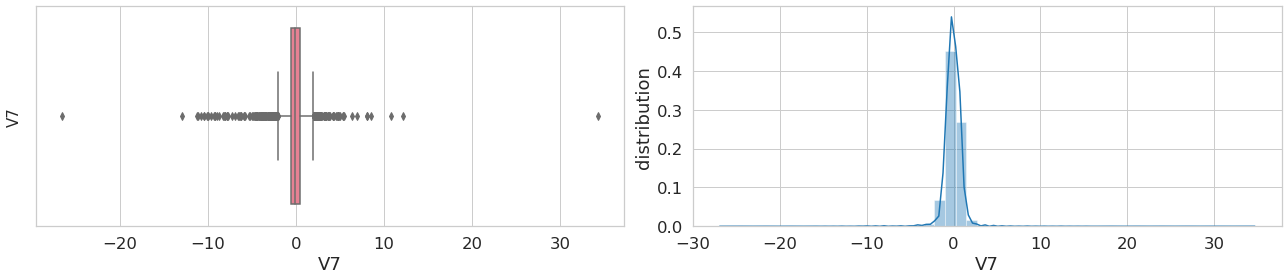

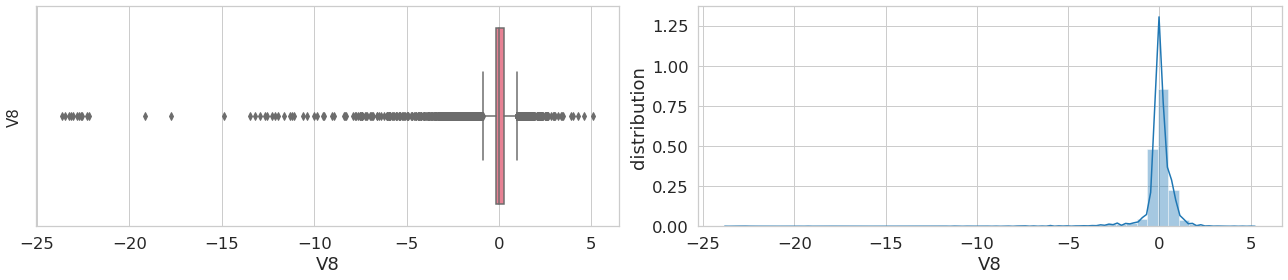

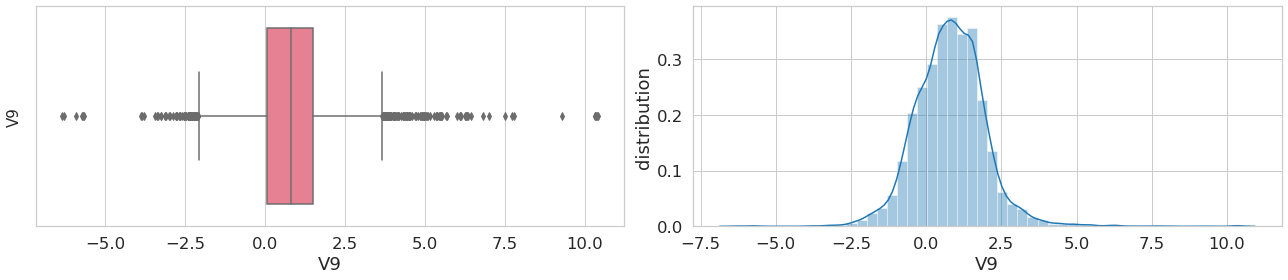

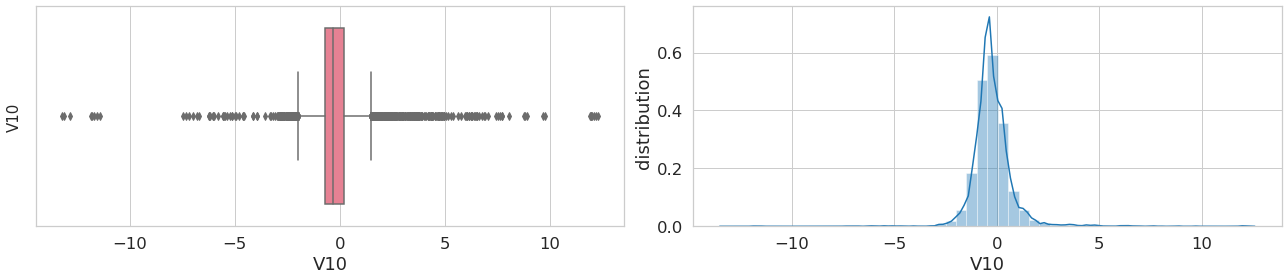

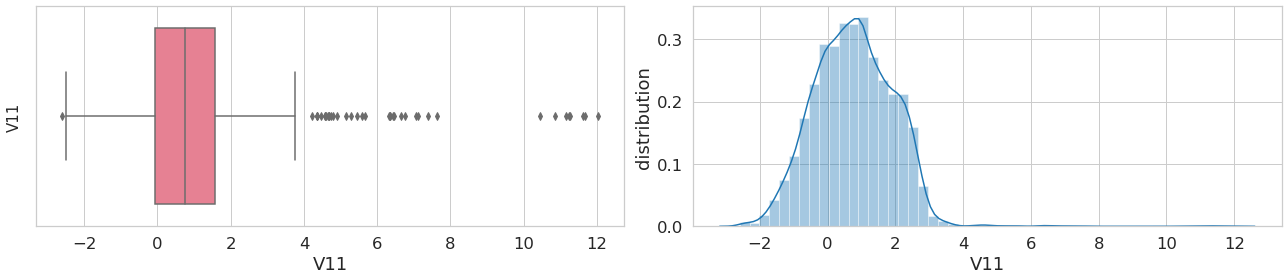

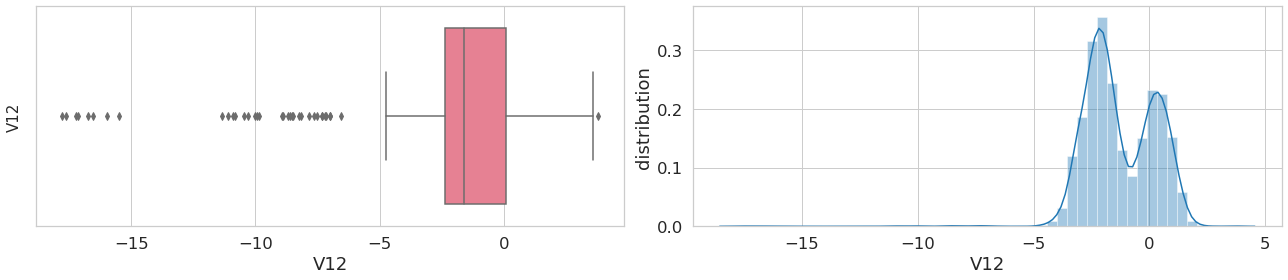

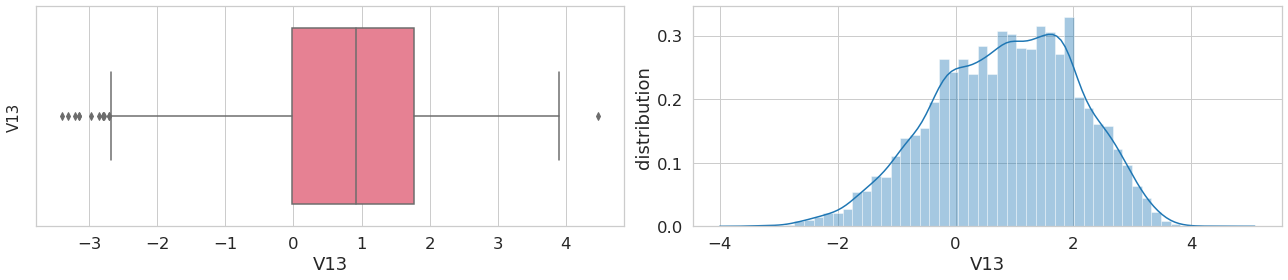

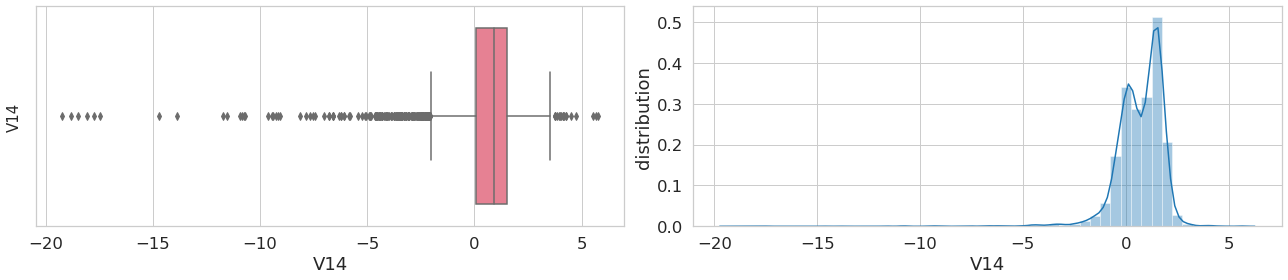

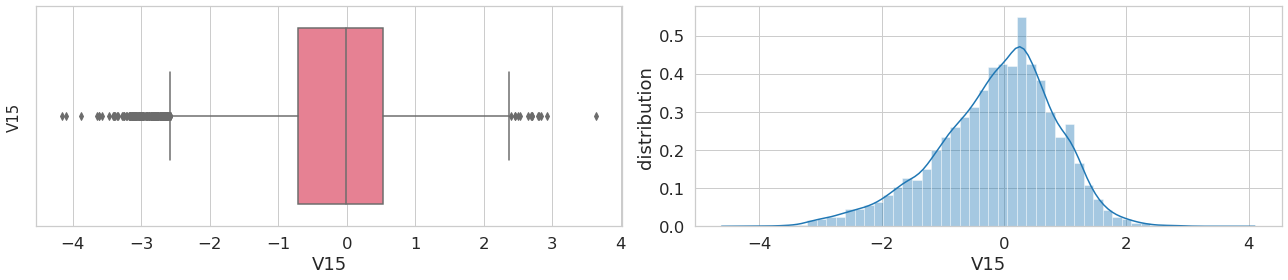

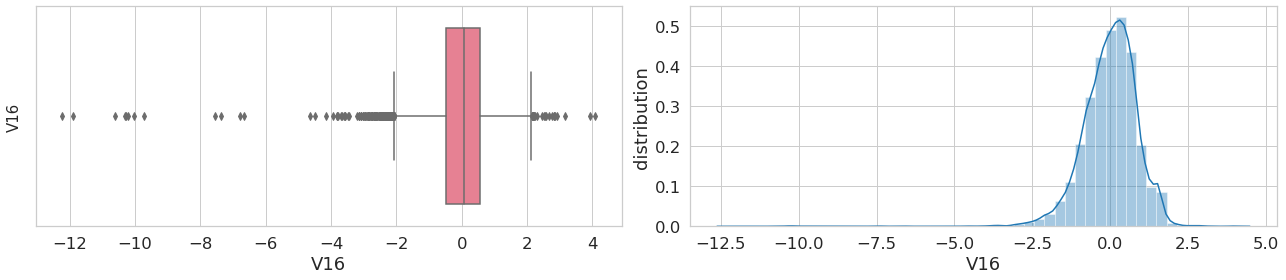

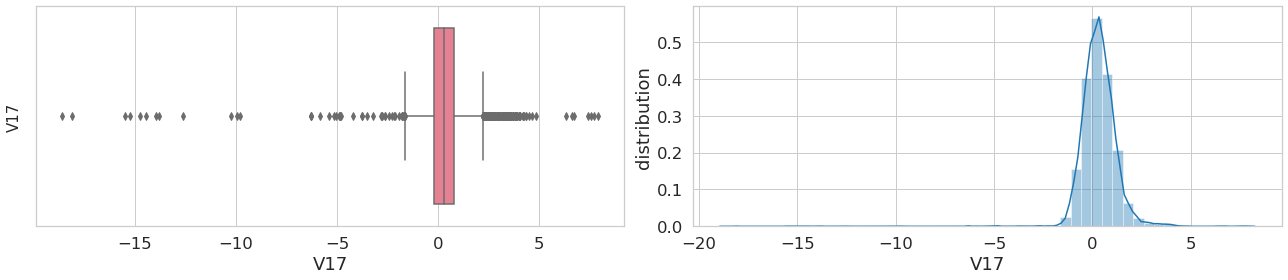

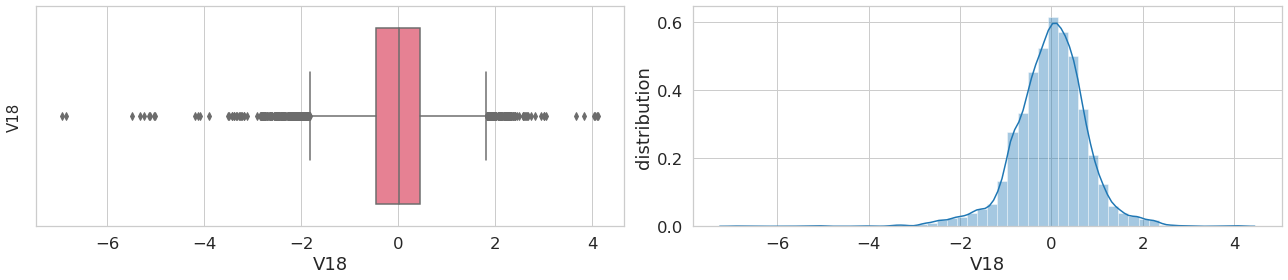

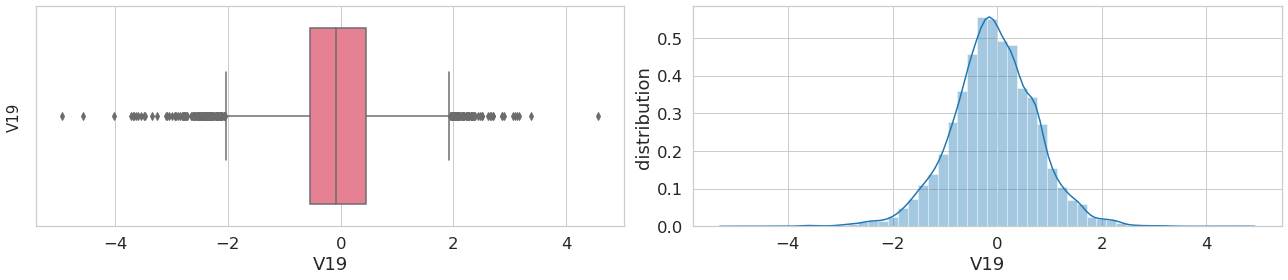

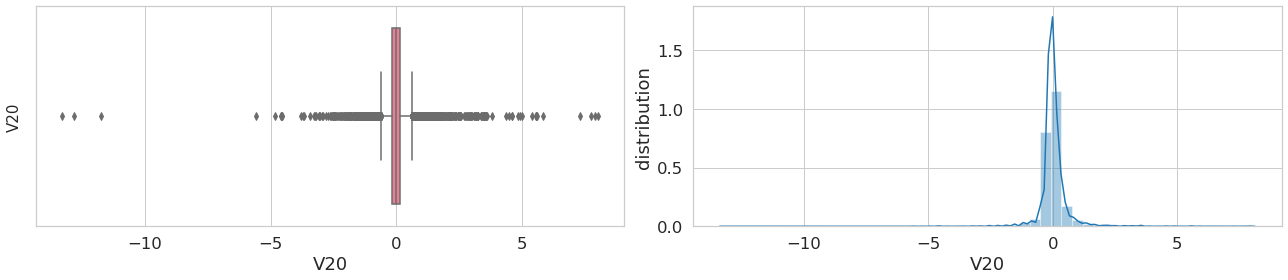

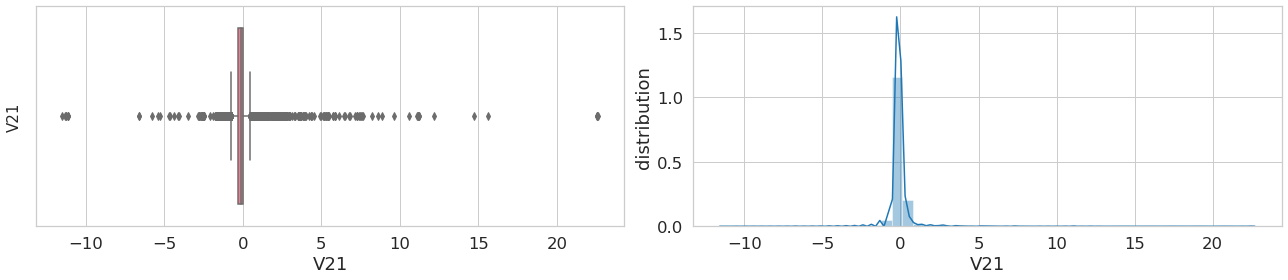

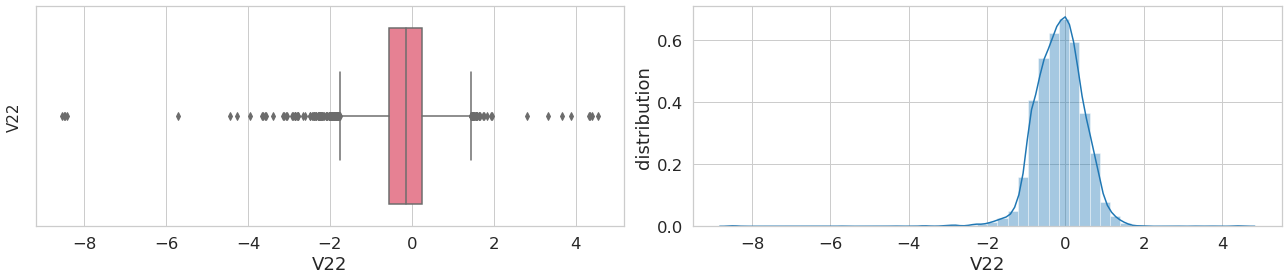

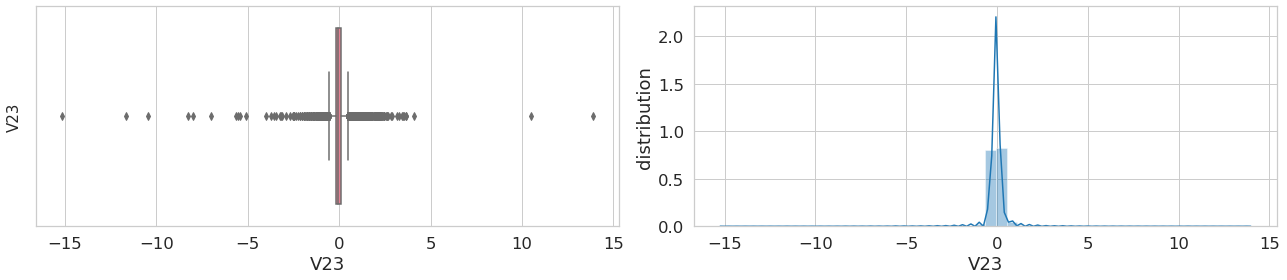

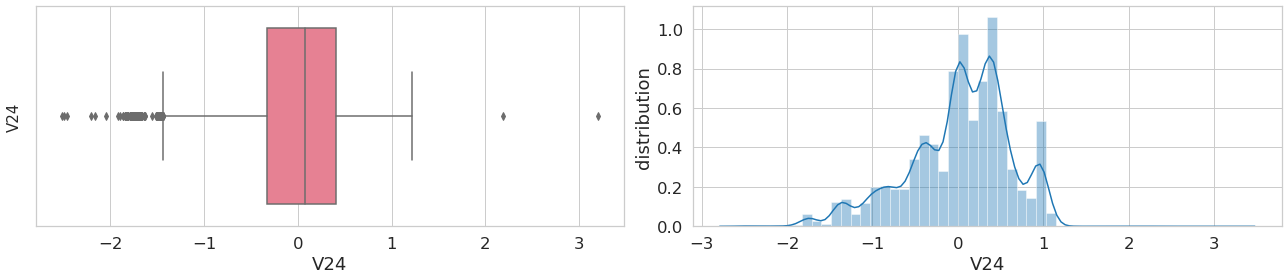

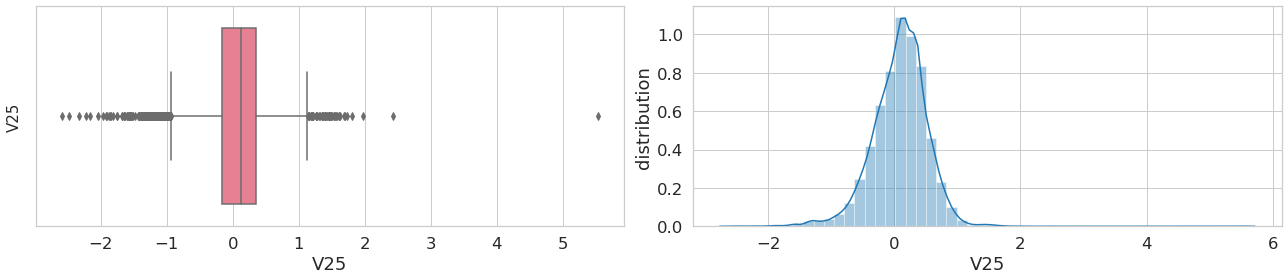

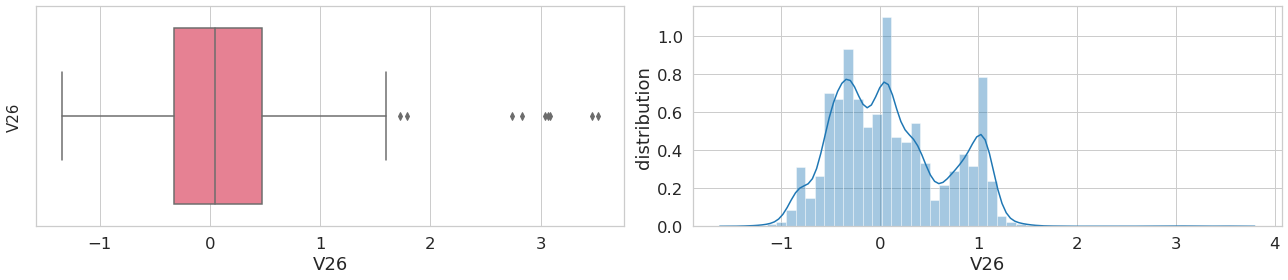

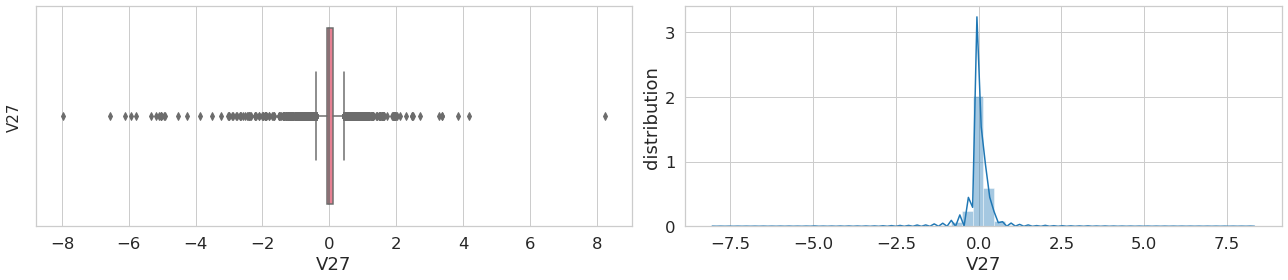

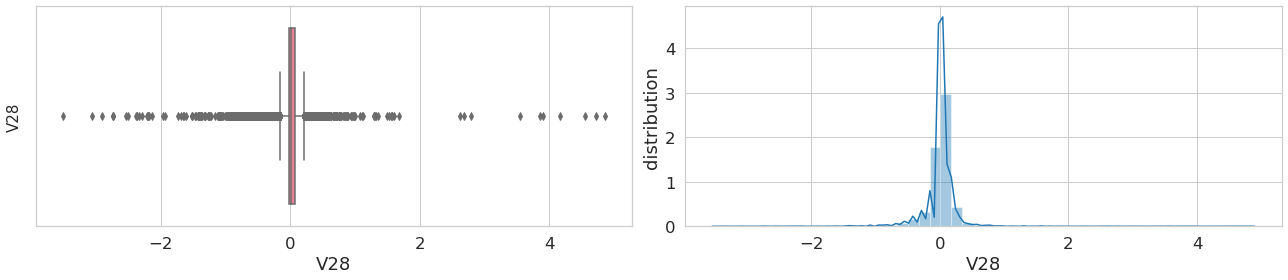

In [7]:
dens = ['Time','Amount','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', ]
for var in dens:
    plt.figure(figsize=(18,4))
    plt.subplot(1, 2, 1)
   
    sns.set_style('whitegrid')
    fig = sns.boxplot(df[var], palette='husl')
    fig.set_title('')
    fig.set_ylabel(var,fontsize=15)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var])
   
    fig.set_ylabel('distribution')
    fig.set_xlabel(var)
    plt.tight_layout()

#### examine the data with *df.describe()*.

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,...,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,...,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,...,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,...,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,...,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


#### Explain the mean and std values for the different features based on the meaning of the features <br>(hint: see the Kaggle task description).

The mean value of ‘Class’ column is 0.00380 which suggests there are more cases of ‘Class’ = 0 ( non-fraudulent transactions).


Let's take for example one of the not transformed fature and will look on it statistic closer:

In [9]:
df.Amount.describe()

count    10000.000000
mean        63.030188
std        184.486158
min          0.000000
25%          5.000000
50%         15.950000
75%         50.960000
max       7712.430000
Name: Amount, dtype: float64

We see, that mean value of `Amount` is less than std; and 50% and 75% fractions are also less than mean and std - that's an alarm for us, which saying that the data contains outliyers and imballanced

The data set is very widely distributed with a (strong) positive skewness.

The min and the max values are also has a huge distance in light of distribution of 25%, 50% and 75% fractions

### 2. What percentage of transactions in the dataset are fraudulent?


In [10]:
df.Class.value_counts()/len(df)*100

0    99.62
1     0.38
Name: Class, dtype: float64

0.38 percent (38 of 10000) are fraudulent transactions which suggests this is an Anomaly Detection problem.

We have very unballanced data: only 0.38% of target values are 1, i.e. less than 0.5% of transactions in the dataset are marked as fraudulent

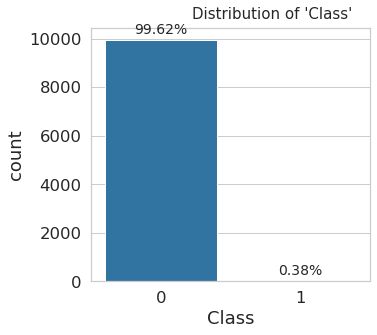

In [11]:
plt.figure(figsize=(5,3))
bar = sns.countplot(x='Class', data=df)
plt.text(0.8, 11000,"Distribution of 'Class'",
     horizontalalignment='center',
     verticalalignment='center',
        fontsize=15)
plt.subplots_adjust(top=1.3)
for p in bar.patches:
        bar.annotate('{}%'.format(round(p.get_height()/len(df)*100,2), '.2f'), \
                       (p.get_x() + p.get_width() / 2.,p.get_height()),ha = 'center', \
                       va = 'center',xytext = (0, 10),textcoords = 'offset points',size = 14);

### 3. Use sklearn.neighbors.LocalOutlierFactor with default parameters to detect outliers in transaction details, using df.drop(...) to drop the column with target labels (legitimate/fraudulent). 


In [12]:
y = df.Class
X = df.drop('Class', axis=1)
X.shape, y.shape

((10000, 30), (10000,))

In [13]:
clf = LocalOutlierFactor()

# use fit_predict to compute the predicted labels of the training samples
y_pred = clf.fit_predict(X)
scores_prediction = clf.negative_outlier_factor_

#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

#### How many outliers are detected by default?

In [14]:
def anomaly_metrics(y,y_pred):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel() 
    print(f"True Positive are: {tp}")
    print(f"False Negative are: {fn}")    
    print(f"Local Outlier Factor(error): {fn+fp}")
    print(f"Outlier_Fraction: {(tp/tn*100).round(3)}%")
    print(f"Accuracy Score: {accuracy_score(y,y_pred)}")
    

In [15]:
 # Run Classification Metrics
anomaly_metrics(y,y_pred)

True Positive are: 7
False Negative are: 31
Local Outlier Factor(error): 971
Outlier_Fraction: 0.078%
Accuracy Score: 0.9029


As we can see, we detected only 7 cases as fraudulent and 31 as mistaken non fraudulent.

The Outlier_Fraction: 0.078% - that's not responding the real situation we have



### 4. Use sklearn.metrics.confusion_matrix   to compare the results from 3 with the target labels. 

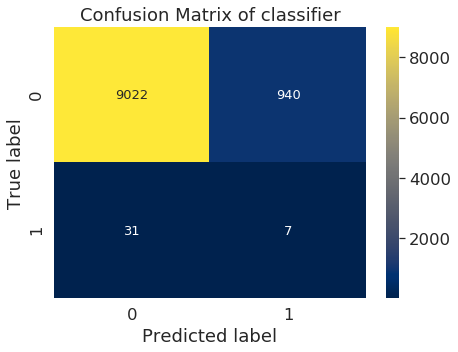

In [16]:
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(7,5))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, annot_kws={"size": 13},fmt="d", cmap=plt.cm.cividis)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix of classifier')
    
draw_confusionmatrix(y, y_pred)

#### and sklearn.metrics.classification_report   to compare the results from 3 with the target labels. 

In [17]:
print(f"Classification Report: \n{classification_report(y,y_pred)}")

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      9962
           1       0.01      0.18      0.01        38

    accuracy                           0.90     10000
   macro avg       0.50      0.54      0.48     10000
weighted avg       0.99      0.90      0.95     10000



We got a very low recall score for lable 1 == 0.18

#### Is the default output of LOF better than randomly selecting the number from question 3 of transactions as outliers? 


In [18]:
np.random.seed(42)
y_rand = np.random.binomial(size=df.shape[0], n=1, p=df.Class[df.Class==1].value_counts()/len(df)*100)

y_rand[y_rand==1].sum()/len(y)*100

36.97

We got the fraction of label 1 = 36.97% with randomly selecting the number of transactions as outliers

Let's calculate the metrics for that variable

True Positive are: 11
False Negative are: 27
Local Outlier Factor(error): 3713
Outlier_Fraction: 0.175%
Accuracy Score: 0.6287
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.63      0.77      9962
           1       0.00      0.29      0.01        38

    accuracy                           0.63     10000
   macro avg       0.50      0.46      0.39     10000
weighted avg       0.99      0.63      0.77     10000



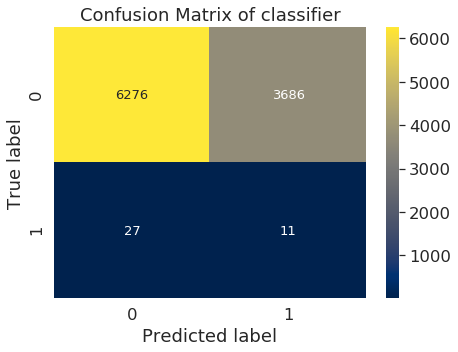

In [19]:
anomaly_metrics(y,y_rand)
draw_confusionmatrix(y, y_rand)
print(f"Classification Report: \n{classification_report(y,y_rand)}")

It seems, that the randomly selecting the number of transactions as outliers is better than the default output of LOF

#### Why or why not?

Why? Because with random sampling we got higher recall score for outliers
<br>The accuracy became lower in this case
<br>And  we got lower recall for non outliers. <br>So for non outliers  LOF will be better, than random sampling, but for outliers is not

### 5. Try passing different values to the parameter *contamination =* of LocalOutlierFactor and compare classification reports. 


In [20]:
parameters = [0.02, 0.08, 0.12, 0.18, 0.22, 0.28, 0.32, 0.38, 0.42, 0.48, 0.5]
precisions = []
recalls = []
fpr = []

for i in parameters:
    clf = LocalOutlierFactor(contamination = i)
    y_pred = clf.fit_predict(X)
    scores_prediction = clf.negative_outlier_factor_
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    precisions.append(tp/(tp+fp))
    recalls.append(tp/(tp+fn))
    fpr.append(fp/(fp+tn))
    
    print(f"\n\nparameter contamination = {i}\n__________________________________________________________")
    anomaly_metrics(y,y_pred)
    print(f"\nConfusion Matrix:\n{confusion_matrix(y, y_pred)}\n")    
    print(f"Classification Report: \n{classification_report(y,y_pred)}\n__________________________________________________________\n")



parameter contamination = 0.02
__________________________________________________________
True Positive are: 2
False Negative are: 36
Local Outlier Factor(error): 234
Outlier_Fraction: 0.02%
Accuracy Score: 0.9766

Confusion Matrix:
[[9764  198]
 [  36    2]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9962
           1       0.01      0.05      0.02        38

    accuracy                           0.98     10000
   macro avg       0.50      0.52      0.50     10000
weighted avg       0.99      0.98      0.98     10000

__________________________________________________________



parameter contamination = 0.08
__________________________________________________________
True Positive are: 7
False Negative are: 31
Local Outlier Factor(error): 824
Outlier_Fraction: 0.076%
Accuracy Score: 0.9176

Confusion Matrix:
[[9169  793]
 [  31    7]]

Classification Report: 
              precision    recall  f1-

#### How does this parameter affect the output of LOF?

The higher parameter contamination value, the lower accuracy of the model we got.<br>But recall for outliers becomes higher and for label 0 - lower.<br>The precision score doesn't changes at all<br>With parameter contamination = 0.38 (the same as fractions of outliers in our data set) we got the same accuracy, precision and recall scores as it was with random sampling

### 6. Would it make more sense to use an ROC curve or a precision-recall curve to decide on the best value for this parameter? 


Yes, it will make sense to use an ROC curve and a PR curve

#### Why?

Because we have a very unballanced data, so we have to care about our FPR = (FP / (FP + TN)) and Recall. We want to decrease our mistakes (False Positive): to not detect a regular transaction as fraudulent 

### 7. Plot the curve you chose in 6.<br> Hint: For true labels *y_true* and predicted labels *y_pred*, you can get the number of true/false positives/negatives using *tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()*.


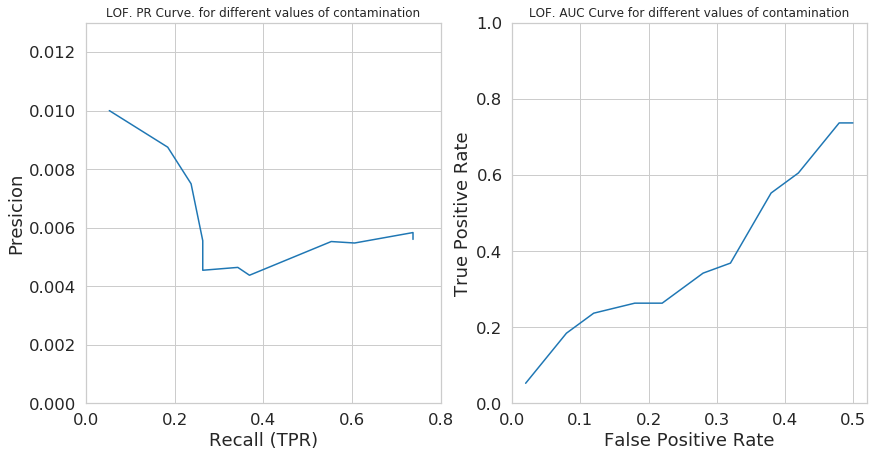

In [21]:
# plot precision-recall and AUC curve

fig = plt.figure(figsize = (14,7))
ax1 = plt.subplot(121)
ax1.plot(recalls, precisions) 
plt.ylim(0,0.013)
plt.xlim(0,0.8)
plt.xlabel("Recall (TPR)")
plt.ylabel("Presicion")
plt.title('LOF. PR Curve. for different values of contamination',fontsize=12);

ax2 = plt.subplot(122)
ax2.plot(fpr, recalls) 
plt.ylim(0,1)
plt.xlim(0,0.52)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('LOF. AUC Curve for different values of contamination', fontsize=12);

### 8. Repeat 5-7 using sklearn.ensemble.IsolationForest. In 7, plot the curve on top of the curve for LOF. 

In [22]:
df = pd.read_csv('creditcard_10k.csv.gz', compression="gzip")
y = df.Class
X = df.drop('Class', axis=1)
X.shape, y.shape

((10000, 30), (10000,))

In [23]:
parameters_if = [0.012, 0.018, 0.022, 0.028, 0.032, 0.038, 0.042, 0.048, 0.05,0.08, 0.1]
precisions_if = []
recalls_if = []
fpr_if = []

for i in parameters_if:
    ifc = IsolationForest(contamination = i).fit(X) 
    y_pred_if = ifc.predict(X) 
    y_pred_if[y_pred_if == 1] = 0 
    y_pred_if[y_pred_if == -1] = 1 

    tn, fp, fn, tp = confusion_matrix(y, y_pred_if).ravel()
    precisions_if.append(tp/(tp+fp))
    recalls_if.append(tp/(tp+fn))
    fpr_if.append(fp/(fp+tn))
    
    print(f"\n\nparameter contamination = {i}\n__________________________________________________________")
    anomaly_metrics(y,y_pred_if)
    print(f"\nConfusion Matrix:\n{confusion_matrix(y, y_pred_if)}\n")    
    print(f"Classification Report: \n{classification_report(y,y_pred_if)}\n__________________________________________________________\n")



parameter contamination = 0.012
__________________________________________________________
True Positive are: 25
False Negative are: 13
Local Outlier Factor(error): 108
Outlier_Fraction: 0.253%
Accuracy Score: 0.9892

Confusion Matrix:
[[9867   95]
 [  13   25]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9962
           1       0.21      0.66      0.32        38

    accuracy                           0.99     10000
   macro avg       0.60      0.82      0.66     10000
weighted avg       1.00      0.99      0.99     10000

__________________________________________________________



parameter contamination = 0.018
__________________________________________________________
True Positive are: 33
False Negative are: 5
Local Outlier Factor(error): 152
Outlier_Fraction: 0.336%
Accuracy Score: 0.9848

Confusion Matrix:
[[9815  147]
 [   5   33]]

Classification Report: 
              precision    recall 

On the position with parameter parameter contamination = 0.038 we got the minimum False Negative(=1) with the same time  minimum error(=344)

The accuracy was 97% with recall 97% for label 1 and the same 97% recall for label 0

yes, we steel making mistakes, predicting as  the fraudulent transactions 1 from 38, but 37  from 38 fraudulent transactions we are predicting correct



And if we want the 100% correct detection of label 1, then we have to put parameter contamination = 0.048, Then we will have all 38 cases of fraudulent transactions detected as fraudulent transactions and accuracy of the model will be 96%


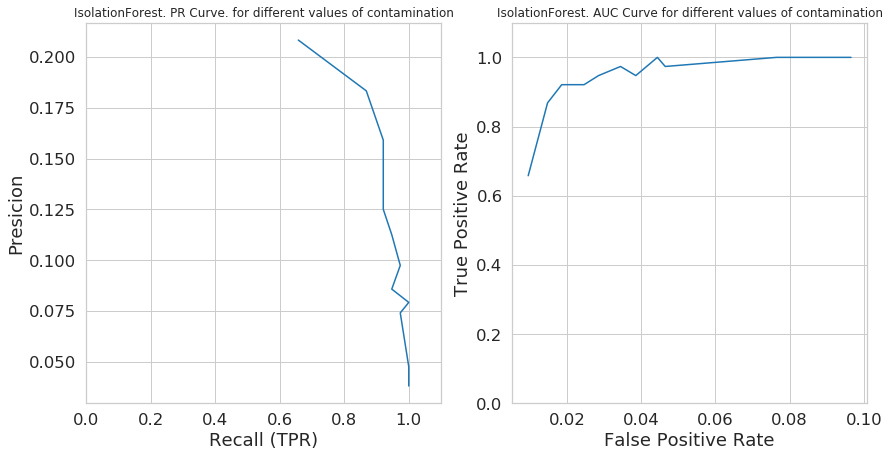

In [24]:
# plot precision-recall and AUC curve

fig = plt.figure(figsize = (14,7))
ax1 = plt.subplot(121)
ax1.plot(recalls_if, precisions_if) 
plt.xlim(0,1.1)
plt.xlabel("Recall (TPR)")
plt.ylabel("Presicion")
plt.title('IsolationForest. PR Curve. for different values of contamination',fontsize=12);

ax2 = plt.subplot(122)
ax2.plot(fpr_if, recalls_if) 
plt.ylim(0,1.1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('IsolationForest. AUC Curve for different values of contamination', fontsize=12);

We see on the plot that values are different from those, which we got with LOF algorithm, so maybe we should compare Precision and Recal of two algorithms on one plot

As we can understand for now, the IsolationForest is much much better than LOF and with less values of the same parametr

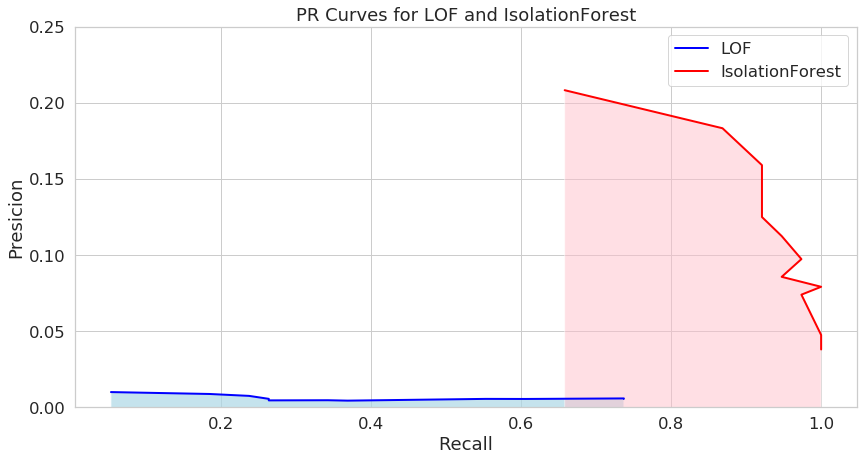

In [25]:
fig = plt.figure(figsize = (14,7))
plt.plot(recalls, precisions, 'b', linewidth=2, label="LOF") 
plt.fill_between(recalls, precisions,-1, facecolor='lightblue', alpha=0.7)

plt.plot(recalls_if, precisions_if,"r", linewidth=2, label = "IsolationForest")
plt.fill_between(recalls_if, precisions_if,-1, facecolor='pink', alpha=0.5)
plt.ylim(0,0.25)
plt.xlabel("Recall");
plt.ylabel("Presicion");
plt.legend();
plt.title('PR Curves for LOF and IsolationForest');

### What algorithm and parameter value would you choose?

Definitely it's better to choose Isolation Forest with parameter contamination = 0.048